<a href="https://colab.research.google.com/github/BlackCurrantDS/DeepLearning/blob/main/Deep_Learning_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Required Imports 

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datasets import MNISTDataset

In [ ]:
#Getting MNIST data
mnist = tf.keras.datasets.mnist
type(mnist)

module

In [ ]:
#this loads data into train and test arrays
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
#since its the pixels of images will use imshow library , seeing first 5 images

The Training Label is  5


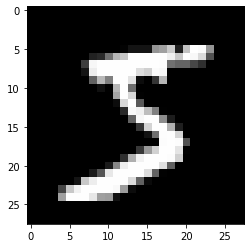

The Training Label is  0


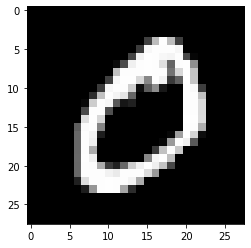

The Training Label is  4


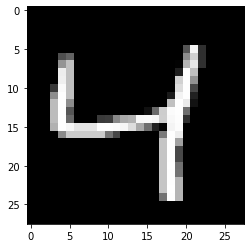

The Training Label is  1


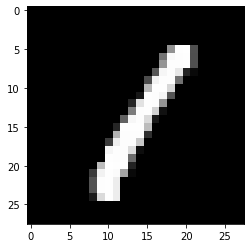

In [ ]:
for i in range(4):
  print("The Training Label is ",train_labels[i] )
  plt.imshow(train_images[i], cmap="Greys_r")
  plt.show()

Basics needed - 

1. Input Layers
2. Output Layer
3. Single Hidden Layer
4. Function - Gonna use Softmax for hiddena and out
5. Weights from input layer to hidden layer, hidden to out
6. Bias from inout to hidden , hidden to out
7. how many units in hidden layer?
8. Loss fucntion

Just to keep a note to myself about Number of epoc, number of steps

7770 rows, we break it into small batches of size 128, this will give us 60 batches.

This will require tf to go through 60 iterations/steps to train to model. If we want to go over this dataset 10 times, set `num_epochs=10` will do the job, or, set `steps=600` should yield the same flow.

Source- https://medium.com/@linda0511ny/tensorflow-train-dataset-by-epochs-or-steps-3839705f307d

#Learning Rate is step size

In [ ]:
data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)

In [ ]:
train_steps = 1000
learning_rate = 0.1

In [ ]:
#for hidden layer
W1 = tf.Variable(np.zeros([784, 10]).astype(np.float32))
b1 = tf.Variable(np.zeros(10, dtype=np.float32))

In [ ]:
#with single layer
for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape() as tape:
        logits = tf.matmul(img_batch, W1) + b1
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=lbl_batch))
        
    grads = tape.gradient(xent, [W1, b1])
    W1.assign_sub(learning_rate * grads[0])
    b1.assign_sub(learning_rate * grads[1])
    
    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        print("Loss: {} Accuracy: {}".format(xent, acc))

Loss: 2.3025853633880615 Accuracy: 0.0859375
Loss: 0.5869016051292419 Accuracy: 0.84375
Loss: 0.4638957381248474 Accuracy: 0.9140625
Loss: 0.5068713426589966 Accuracy: 0.78125
Loss: 0.36521804332733154 Accuracy: 0.921875
Starting new epoch...
Loss: 0.31971824169158936 Accuracy: 0.9375
Loss: 0.3669887185096741 Accuracy: 0.890625
Loss: 0.2975621819496155 Accuracy: 0.9140625
Loss: 0.35932064056396484 Accuracy: 0.921875
Loss: 0.335277795791626 Accuracy: 0.875
Starting new epoch...


In [ ]:
test_preds = tf.argmax(tf.matmul(data.test_data, W1) + b1, axis=1,
                       output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
print("Accuracy with single layer is",acc)

Accuracy with single layer is tf.Tensor(0.911, shape=(), dtype=float32)


In [ ]:
#adding single hidden layer only and experimeting wiht number fof units in single hidden layer

In [ ]:
#single laye with zeros

In [ ]:
#for 1 hidden layer
units = [784,512,350,256 ,128, 50, 10]
for i in units:
  W1 = tf.Variable(np.zeros([784, i],dtype=np.float32))
  b1 = tf.Variable(np.zeros(i, dtype=np.float32))

  #for out layer
  W2 = tf.Variable(np.zeros([i, 10],dtype=np.float32))
  b2 = tf.Variable(np.zeros(10, dtype=np.float32))

  for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape(persistent=True) as tape:
        logits1 = tf.matmul(img_batch, W1) + b1
        logit = tf.matmul(logits1, W2) + b2
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logit, labels=lbl_batch))
        
        
    grads1 = tape.gradient(xent, [W1, b1])
    W1.assign_sub(learning_rate * grads1[0])
    b1.assign_sub(learning_rate * grads1[1])

      
    grads2 = tape.gradient(xent, [W2, b2])
    W2.assign_sub(learning_rate * grads2[0])
    b2.assign_sub(learning_rate * grads2[1])

  test_preds_layer_1 = tf.matmul(data.test_data, W1) + b1
  test_preds = tf.argmax(tf.matmul(test_preds_layer_1, W2) + b2, axis=1,
                       output_type=tf.int32)
  acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
  print("Accuracy with {} units is {}".format(i, acc))

Starting new epoch...
Starting new epoch...
Accuracy with 784 units is 0.11349999904632568
Starting new epoch...
Starting new epoch...
Starting new epoch...
Accuracy with 512 units is 0.11349999904632568
Starting new epoch...
Starting new epoch...
Accuracy with 350 units is 0.11349999904632568
Starting new epoch...
Starting new epoch...
Accuracy with 256 units is 0.11349999904632568
Starting new epoch...
Starting new epoch...
Accuracy with 128 units is 0.11349999904632568
Starting new epoch...
Starting new epoch...
Accuracy with 50 units is 0.11349999904632568
Starting new epoch...
Starting new epoch...
Accuracy with 10 units is 0.11349999904632568


In [ ]:
#for 1 hidden layer , but with uniform weights
units = [784,512,350, 250,128, 50, 10]
for i in units:
  W1 = tf.Variable(tf.random.uniform([784, i], -0.1,0.1,dtype=np.float32))
  b1 = tf.Variable(tf.random.uniform([i], -0.1,0.1, dtype=np.float32))

  #for out layer
  W2 = tf.Variable(tf.random.uniform([i, 10],-0.1,0.1,dtype=np.float32))
  b2 = tf.Variable(tf.random.uniform([10],-0.1,0.1, dtype=np.float32))

  for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape(persistent=True) as tape:
        logits1 = tf.matmul(img_batch, W1) + b1
        logit = tf.matmul(logits1, W2) + b2
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logit, labels=lbl_batch))
        
        
    grads1 = tape.gradient(xent, [W1, b1])
    W1.assign_sub(learning_rate * grads1[0])
    b1.assign_sub(learning_rate * grads1[1])

      
    grads2 = tape.gradient(xent, [W2, b2])
    W2.assign_sub(learning_rate * grads2[0])
    b2.assign_sub(learning_rate * grads2[1])

  test_preds_layer_1 = tf.matmul(data.test_data, W1) + b1
  test_preds = tf.argmax(tf.matmul(test_preds_layer_1, W2) + b2, axis=1,
                       output_type=tf.int32)
  acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
  print("Accuracy with {} units is {}".format(i, acc))

Starting new epoch...
Starting new epoch...
Accuracy with 784 units is 0.9174000024795532
Starting new epoch...
Starting new epoch...
Accuracy with 512 units is 0.9162999987602234
Starting new epoch...
Starting new epoch...
Starting new epoch...
Accuracy with 350 units is 0.91839998960495
Starting new epoch...
Starting new epoch...
Accuracy with 250 units is 0.9135000109672546
Starting new epoch...
Starting new epoch...
Accuracy with 128 units is 0.914900004863739
Starting new epoch...
Starting new epoch...
Accuracy with 50 units is 0.9146000146865845
Starting new epoch...
Starting new epoch...
Accuracy with 10 units is 0.9132000207901001


In [ ]:
#for 1 hidden layer , but with uniform weights and sigmoid activation function on first layer
units = [784,512,350,256, 128, 50, 10]
for i in units:
  W1 = tf.Variable(tf.random.uniform([784, i], -0.1,0.1,dtype=np.float32))
  b1 = tf.Variable(tf.random.uniform([i], -0.1,0.1, dtype=np.float32))

  #for out layer
  W2 = tf.Variable(tf.random.uniform([i, 10],-0.1,0.1,dtype=np.float32))
  b2 = tf.Variable(tf.random.uniform([10],-0.1,0.1, dtype=np.float32))

  for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape(persistent=True) as tape:
        logits1 = tf.nn.sigmoid(tf.matmul(img_batch, W1) + b1)
        logit = tf.matmul(logits1, W2) + b2
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logit, labels=lbl_batch))
        
        
    grads1 = tape.gradient(xent, [W1, b1])
    W1.assign_sub(learning_rate * grads1[0])
    b1.assign_sub(learning_rate * grads1[1])

      
    grads2 = tape.gradient(xent, [W2, b2])
    W2.assign_sub(learning_rate * grads2[0])
    b2.assign_sub(learning_rate * grads2[1])

  test_preds_layer_1 = tf.nn.sigmoid(tf.matmul(data.test_data, W1) + b1)
  test_preds = tf.argmax(tf.matmul(test_preds_layer_1, W2) + b2, axis=1,
                       output_type=tf.int32)
  acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
  print("Accuracy with {} units is {}".format(i, acc))

Starting new epoch...
Starting new epoch...
Accuracy with 784 units is 0.9002000093460083
Starting new epoch...
Starting new epoch...
Accuracy with 512 units is 0.8971999883651733
Starting new epoch...
Starting new epoch...
Starting new epoch...
Accuracy with 350 units is 0.8967000246047974
Starting new epoch...
Starting new epoch...
Accuracy with 256 units is 0.8995000123977661
Starting new epoch...
Starting new epoch...
Accuracy with 128 units is 0.8956000208854675
Starting new epoch...
Starting new epoch...
Accuracy with 50 units is 0.8907999992370605
Starting new epoch...
Starting new epoch...
Accuracy with 10 units is 0.8518999814987183


In [ ]:
#for 1 hidden layer , but with uniform weights and relu
units = [784,512,350,256, 128, 50, 10]
for i in units:
  W1 = tf.Variable(tf.random.uniform([784, i], -0.1,0.1,dtype=np.float32))
  b1 = tf.Variable(tf.random.uniform([i], -0.1,0.1, dtype=np.float32))

  #for out layer
  W2 = tf.Variable(tf.random.uniform([i, 10],-0.1,0.1,dtype=np.float32))
  b2 = tf.Variable(tf.random.uniform([10],-0.1,0.1, dtype=np.float32))

  for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape(persistent=True) as tape:
        logits1 = tf.nn.relu(tf.matmul(img_batch, W1) + b1)
        logit = tf.matmul(logits1, W2) + b2
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logit, labels=lbl_batch))
       
        
    grads1 = tape.gradient(xent, [W1, b1])
    W1.assign_sub(learning_rate * grads1[0])
    b1.assign_sub(learning_rate * grads1[1])
      
    grads2 = tape.gradient(xent, [W2, b2])
    W2.assign_sub(learning_rate * grads2[0])
    b2.assign_sub(learning_rate * grads2[1])

  test_preds_layer_1 = tf.nn.relu(tf.matmul(data.test_data, W1) + b1)
  test_preds = tf.argmax(tf.matmul(test_preds_layer_1, W2) + b2, axis=1,
                       output_type=tf.int32)
  acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
  print("Accuracy with {} units is {}".format(i, acc))

Starting new epoch...
Starting new epoch...
Accuracy with 784 units is 0.9448000192642212
Starting new epoch...
Starting new epoch...
Accuracy with 512 units is 0.9401999711990356
Starting new epoch...
Starting new epoch...
Accuracy with 350 units is 0.9387999773025513
Starting new epoch...
Starting new epoch...
Starting new epoch...
Accuracy with 256 units is 0.9379000067710876
Starting new epoch...
Starting new epoch...
Accuracy with 128 units is 0.9336000084877014
Starting new epoch...
Starting new epoch...
Accuracy with 50 units is 0.9301000237464905
Starting new epoch...
Starting new epoch...
Accuracy with 10 units is 0.9110000133514404


In [ ]:
#adding one more layer, 2 hidden layer with softmax
#for hidden layer
units_i = [784,512,350,256, 128, 50, 10]
units_j = [784,512,350,256, 128, 50, 10]
for x in list(itertools.product(units_i,units_j)):
  W1 = tf.Variable(tf.random.uniform([784, x[0]],-0.1,0.1,dtype=np.float32))
  b1 = tf.Variable(tf.random.uniform([x[0]], -0.1,0.1,dtype=np.float32))

  #for out layer
  W2 = tf.Variable(tf.random.uniform([x[0], x[1]],-0.1,0.1,dtype=np.float32))
  b2 = tf.Variable(tf.random.uniform([x[1]], -0.1,0.1,dtype=np.float32))

  #for final layer
  W3 = tf.Variable(tf.random.uniform([x[1], 10],-0.1,0.1,dtype=np.float32))
  b3 = tf.Variable(tf.random.uniform([10], -0.1,0.1,dtype=np.float32))

  for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape(persistent=True) as tape:
        logits1 = tf.matmul(img_batch, W1) + b1
        logit2 = tf.matmul(logits1, W2) + b2
        logit3 = tf.matmul(logit2, W3) + b3
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logit3, labels=lbl_batch))
        
    grads1 = tape.gradient(xent, [W1, b1])
    W1.assign_sub(learning_rate * grads1[0])
    b1.assign_sub(learning_rate * grads1[1])
      
    grads2 = tape.gradient(xent, [W2, b2])
    W2.assign_sub(learning_rate * grads2[0])
    b2.assign_sub(learning_rate * grads2[1])

      
    grads3 = tape.gradient(xent, [W3, b3])
    W3.assign_sub(learning_rate * grads3[0])
    b3.assign_sub(learning_rate * grads3[1])

  test_preds_layer_1 = tf.matmul(data.test_data, W1) + b1
  test_preds_layer_2 = tf.matmul(test_preds_layer_1, W2) + b2
  test_preds = tf.argmax(tf.matmul(test_preds_layer_2, W3) + b3, axis=1,
                       output_type=tf.int32)
  acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
  print("Accuracy with {} units is {}".format(x, acc))

Starting new epoch...
Starting new epoch...
Accuracy with (784, 784) units is 0.9175000190734863
Starting new epoch...
Starting new epoch...
Starting new epoch...
Accuracy with (784, 512) units is 0.9136000275611877
Starting new epoch...
Starting new epoch...
Accuracy with (784, 350) units is 0.9133999943733215
Starting new epoch...
Starting new epoch...
Accuracy with (784, 256) units is 0.9190000295639038
Starting new epoch...
Starting new epoch...
Accuracy with (784, 128) units is 0.9111999869346619
Starting new epoch...
Starting new epoch...
Accuracy with (784, 50) units is 0.9154999852180481
Starting new epoch...
Starting new epoch...
Accuracy with (784, 10) units is 0.9168999791145325
Starting new epoch...
Starting new epoch...
Accuracy with (512, 784) units is 0.9174000024795532
Starting new epoch...
Starting new epoch...
Starting new epoch...
Accuracy with (512, 512) units is 0.9197999835014343
Starting new epoch...
Starting new epoch...
Accuracy with (512, 350) units is 0.91809

In [ ]:
#adding one more layer, 2 hidden layer with both sigmoid
#for hidden layer
units_i = [784,512,350,256, 128, 50, 10]
units_j = [784,512,350,256, 128, 50, 10]
for x in list(itertools.product(units_i,units_j)):
  W1 = tf.Variable(tf.random.uniform([784, x[0]],-0.1,0.1,dtype=np.float32))
  b1 = tf.Variable(tf.random.uniform([x[0]], -0.1,0.1,dtype=np.float32))

  #for out layer
  W2 = tf.Variable(tf.random.uniform([x[0], x[1]],-0.1,0.1,dtype=np.float32))
  b2 = tf.Variable(tf.random.uniform([x[1]], -0.1,0.1,dtype=np.float32))

  #for final layer
  W3 = tf.Variable(tf.random.uniform([x[1], 10],-0.1,0.1,dtype=np.float32))
  b3 = tf.Variable(tf.random.uniform([10], -0.1,0.1,dtype=np.float32))

  for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape(persistent=True) as tape:
        logits1 = tf.nn.sigmoid(tf.matmul(img_batch, W1) + b1)
        logit2 = tf.nn.sigmoid(tf.matmul(logits1, W2) + b2)
        logit3 = tf.matmul(logit2, W3) + b3
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logit3, labels=lbl_batch))
        
    grads1 = tape.gradient(xent, [W1, b1])
    W1.assign_sub(learning_rate * grads1[0])
    b1.assign_sub(learning_rate * grads1[1])
      
    grads2 = tape.gradient(xent, [W2, b2])
    W2.assign_sub(learning_rate * grads2[0])
    b2.assign_sub(learning_rate * grads2[1])

      
    grads3 = tape.gradient(xent, [W3, b3])
    W3.assign_sub(learning_rate * grads3[0])
    b3.assign_sub(learning_rate * grads3[1])

  test_preds_layer_1 = tf.nn.sigmoid(tf.matmul(data.test_data, W1) + b1)
  test_preds_layer_2 = tf.nn.sigmoid(tf.matmul(test_preds_layer_1, W2) + b2)
  test_preds = tf.argmax(tf.matmul(test_preds_layer_2, W3) + b3, axis=1,
                       output_type=tf.int32)
  acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
  print("Accuracy with {} units is {}".format(x, acc))

Starting new epoch...
Starting new epoch...
Accuracy with (784, 784) units is 0.8955000042915344
Starting new epoch...
Starting new epoch...
Accuracy with (784, 512) units is 0.8927000164985657
Starting new epoch...
Starting new epoch...
Accuracy with (784, 350) units is 0.88919997215271
Starting new epoch...
Starting new epoch...
Accuracy with (784, 256) units is 0.8848000168800354
Starting new epoch...
Starting new epoch...
Accuracy with (784, 128) units is 0.8737999796867371
Starting new epoch...
Starting new epoch...
Starting new epoch...
Accuracy with (784, 50) units is 0.8507999777793884
Starting new epoch...
Starting new epoch...
Accuracy with (784, 10) units is 0.7736999988555908
Starting new epoch...
Starting new epoch...
Accuracy with (512, 784) units is 0.8896999955177307
Starting new epoch...
Starting new epoch...
Accuracy with (512, 512) units is 0.8867999911308289
Starting new epoch...
Starting new epoch...
Accuracy with (512, 350) units is 0.8784000277519226
Starting new

In [ ]:
#adding one more layer, 3 hidden layer
#for hidden layer
units_i = [784,512, 128, 50, 10]
units_j = [784,512, 128, 50, 10]
units_k = [784,512, 128, 50, 10]
for x in list(itertools.product(units_i,units_j,units_k)):
  W1 = tf.Variable(tf.random.normal([784, x[0]],dtype=np.float32))
  b1 = tf.Variable(np.zeros(x[0], dtype=np.float32))

  #for out layer
  W2 = tf.Variable(tf.random.normal([x[0], x[1]],dtype=np.float32))
  b2 = tf.Variable(np.zeros(x[1], dtype=np.float32))

  #for out layer
  W3 = tf.Variable(tf.random.normal([x[1], x[2]],dtype=np.float32))
  b3 = tf.Variable(np.zeros(x[2], dtype=np.float32))

  #for final layer
  W4 = tf.Variable(tf.random.normal([x[2], 10],dtype=np.float32))
  b4 = tf.Variable(np.zeros(10, dtype=np.float32))

  for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape() as tape:
        logits1 = tf.matmul(img_batch, W1) + b1
        xent1 = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits1, labels=lbl_batch))
        
    grads1 = tape.gradient(xent1, [W1, b1])
    W1.assign_sub(learning_rate * grads1[0])
    b1.assign_sub(learning_rate * grads1[1])

    with tf.GradientTape() as tape:
      logit2 = tf.matmul(tf.matmul(img_batch, W1) + b1, W2) + b2
      xent2 = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logit2, labels=lbl_batch))
      
    grads2 = tape.gradient(xent2, [W2, b2])
    W2.assign_sub(learning_rate * grads2[0])
    b2.assign_sub(learning_rate * grads2[1])

    with tf.GradientTape() as tape:
      logit3 = tf.matmul(logit2, W3) + b3
      xent3 = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logit3, labels=lbl_batch))
      
    grads3 = tape.gradient(xent3, [W3, b3])
    W3.assign_sub(learning_rate * grads3[0])
    b3.assign_sub(learning_rate * grads3[1])

    with tf.GradientTape() as tape:
      logit4 = tf.matmul(logit3, W4) + b4
      xent4 = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logit4, labels=lbl_batch))
      
    grads4 = tape.gradient(xent4, [W4, b4])
    W4.assign_sub(learning_rate * grads4[0])
    b4.assign_sub(learning_rate * grads4[1])

  test_preds_layer_1 = tf.matmul(data.test_data, W1) + b1
  test_preds_layer_2 = tf.matmul(test_preds_layer_1, W2) + b2
  test_preds_layer_3 = tf.matmul(test_preds_layer_2, W3) + b3
  test_preds = tf.argmax(tf.matmul(test_preds_layer_3, W4) + b4, axis=1,
                       output_type=tf.int32)
  acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
  print("Accuracy with {} units is {}".format(x, acc))

Starting new epoch...
Starting new epoch...
Accuracy with (784, 784, 784) units is 0.7628999948501587
Starting new epoch...
Starting new epoch...
Accuracy with (784, 784, 512) units is 0.7745000123977661
Starting new epoch...
Starting new epoch...
Accuracy with (784, 784, 128) units is 0.6452999711036682
Starting new epoch...
Starting new epoch...
Starting new epoch...
Accuracy with (784, 784, 50) units is 0.8434000015258789
Starting new epoch...
Starting new epoch...
Accuracy with (784, 784, 10) units is 0.8863999843597412
Starting new epoch...
Starting new epoch...
Accuracy with (784, 512, 784) units is 0.7609999775886536
Starting new epoch...
Starting new epoch...
Accuracy with (784, 512, 512) units is 0.7638999819755554
Starting new epoch...
Starting new epoch...
Accuracy with (784, 512, 128) units is 0.7767999768257141
Starting new epoch...
Starting new epoch...
Accuracy with (784, 512, 50) units is 0.7572000026702881
Starting new epoch...
Starting new epoch...
Accuracy with (784,

KeyboardInterrupt: ignored